In [5]:
from helpers import bert_helper, datasets, grinders, helpers

import os, shutil
import csv
import pickle

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

%matplotlib notebook


def get_spearman_results_for(dataset):
    results_file = '../data/all_multicluster_layer_analysis_results_'+dataset+ '_'+'2020-06-26'+'.csv'
    fieldnames = ['dataset', 'similarity_measure', 'layer', 'k_clusters', 'pearson', 'pearson_P', 'spearman', 'spearman_P', 'N']
    with open(results_file, mode='r') as disk:
        reader = csv.DictReader(disk, delimiter='\t', fieldnames=fieldnames)
        
        data = [row for row in reader]

        for row in data:
            row['spearman'] = float(row['spearman'])
            row['layer'] = int(row['layer'])
            row['k_clusters'] = int(row['k_clusters'])
        df = pd.DataFrame.from_records(data, coerce_float=True)

        return df


def get_table_data_for(dataset, sim_measure):
    df = get_spearman_results_for(dataset) 
    df = df[df['similarity_measure'] == sim_measure]

    df = df.pivot(index='k_clusters', columns='layer', values='spearman')
    df = df.round(3)
    #df.style.format("{:.3%}")
    #pd.options.display.float_format = '${:,.2f}'.format

    print(df)
    print("dataset %s" % dataset)
    print("sim measure %s" % sim_measure)
    #return df.to_csv(quoting=csv.QUOTE_ALL)
    return df


def heatmap(dataset, sim_measure,i):
        res = get_table_data_for(dataset, sim_measure)
        sns.heatmap(res, cmap="YlGnBu")
        plt.figure(i)
        f, ax = plt.subplots()
        sns.heatmap(res, annot=True, fmt='.3f', linewidths=.5, ax=ax, cmap="YlGnBu", square=False)
        #display(f)

similarity_measures = ['max_sim', 'avg_sim']
# datasets = {'ws_353': ws353, 
#             'ws353_rel': ws353_rel,  
#             'simlex': simlex, 
#             'verbsim': verbsim, 
#             'men': men }
datasets = ['ws_353', 'ws353_rel', 'simlex', 'verbsim', 'men']

sns.set()

# res = get_table_data_for('simlex', 'max_sim')

# f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(res, annot=True, fmt='.3f', linewidths=.5, ax=ax, cmap="YlGnBu", square=False)
# plt.show()
#print(res.to_csv())

# i=0
# for s in similarity_measures:
#     for d in datasets:
#         heatmap(d,s,i)
#         i+=1


layer          0      1      2      3      4      5      6      7      8   \
k_clusters                                                                  
1           0.802  0.804  0.796  0.776  0.767  0.776  0.784  0.782  0.768   
2           0.807  0.812  0.805  0.784  0.787  0.795  0.798  0.799  0.794   
3           0.805  0.811  0.796  0.785  0.797  0.805  0.806  0.805  0.808   
4           0.807  0.812  0.799  0.789  0.797  0.808  0.808  0.807  0.812   
5           0.813  0.813  0.800  0.786  0.798  0.806  0.810  0.812  0.815   
6           0.810  0.808  0.797  0.784  0.794  0.803  0.809  0.811  0.821   
7           0.806  0.805  0.794  0.774  0.789  0.802  0.805  0.813  0.817   
8           0.809  0.806  0.793  0.767  0.789  0.797  0.802  0.807  0.817   
9           0.808  0.810  0.781  0.750  0.773  0.790  0.805  0.807  0.824   
10          0.807  0.809  0.778  0.752  0.755  0.781  0.809  0.810  0.821   

layer          9      10     11  
k_clusters                       
1      

<IPython.core.display.Javascript object>


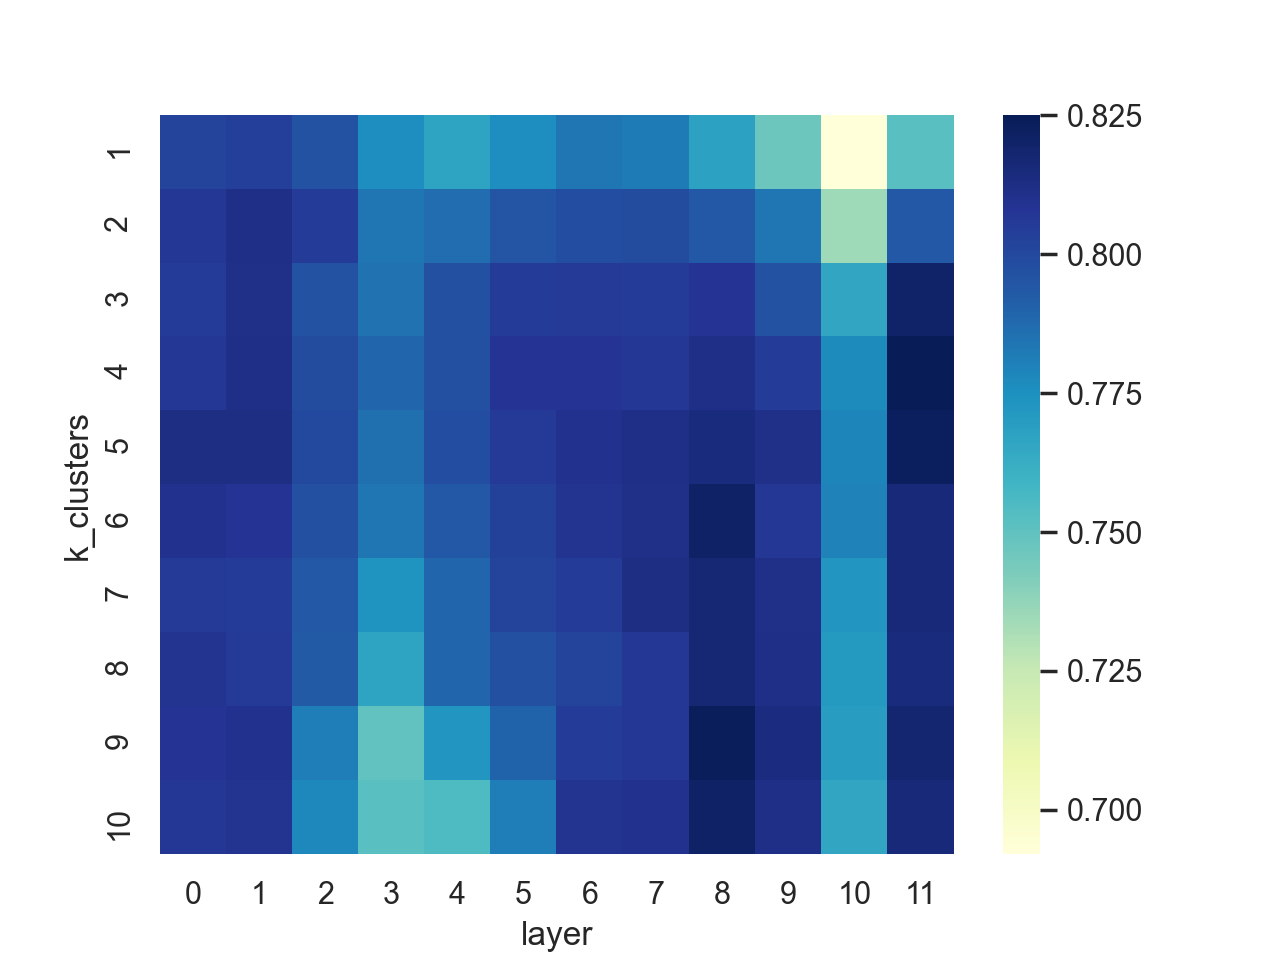

<IPython.core.display.Javascript object>


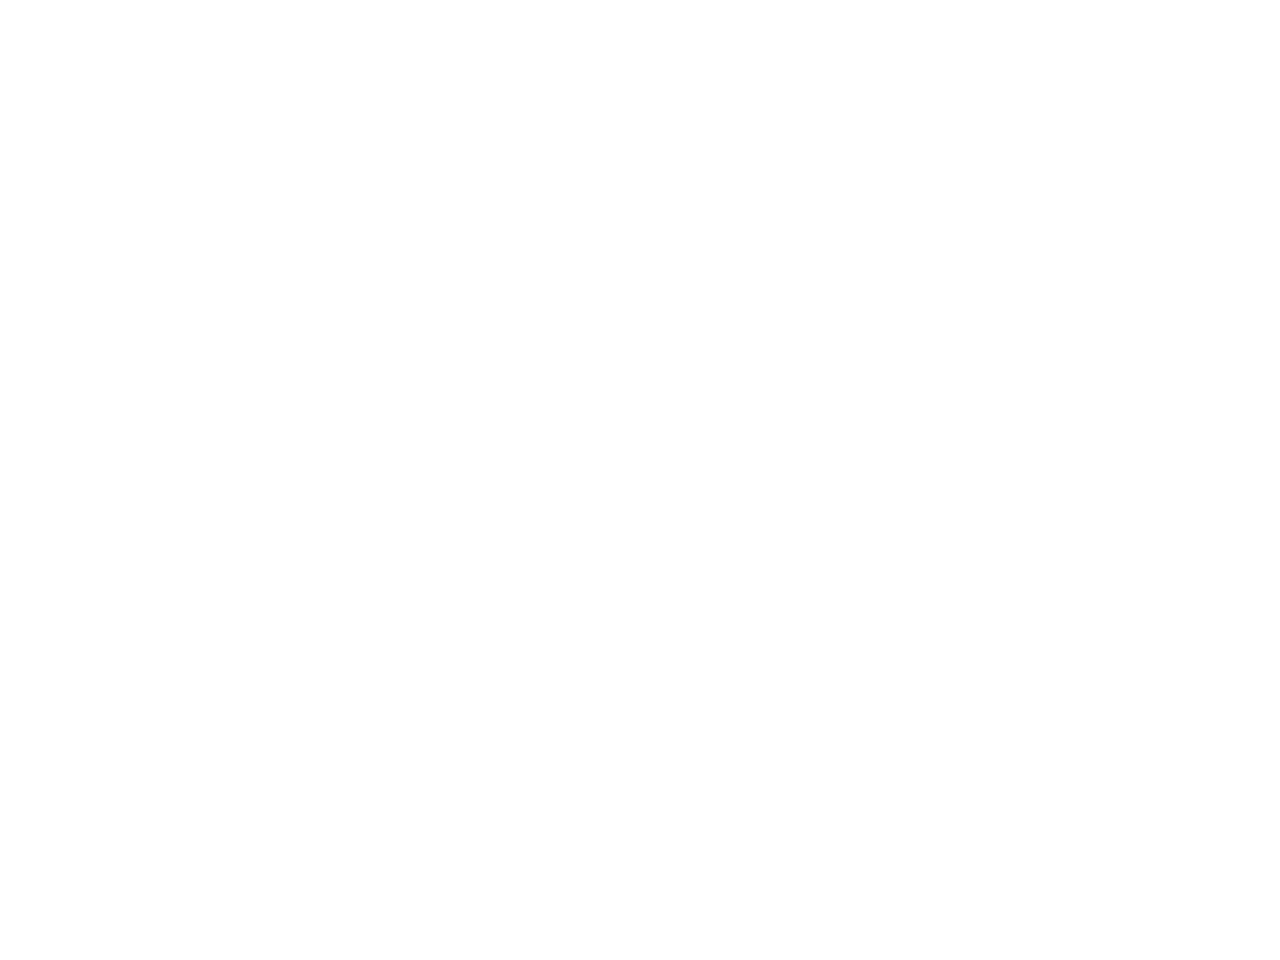

<IPython.core.display.Javascript object>


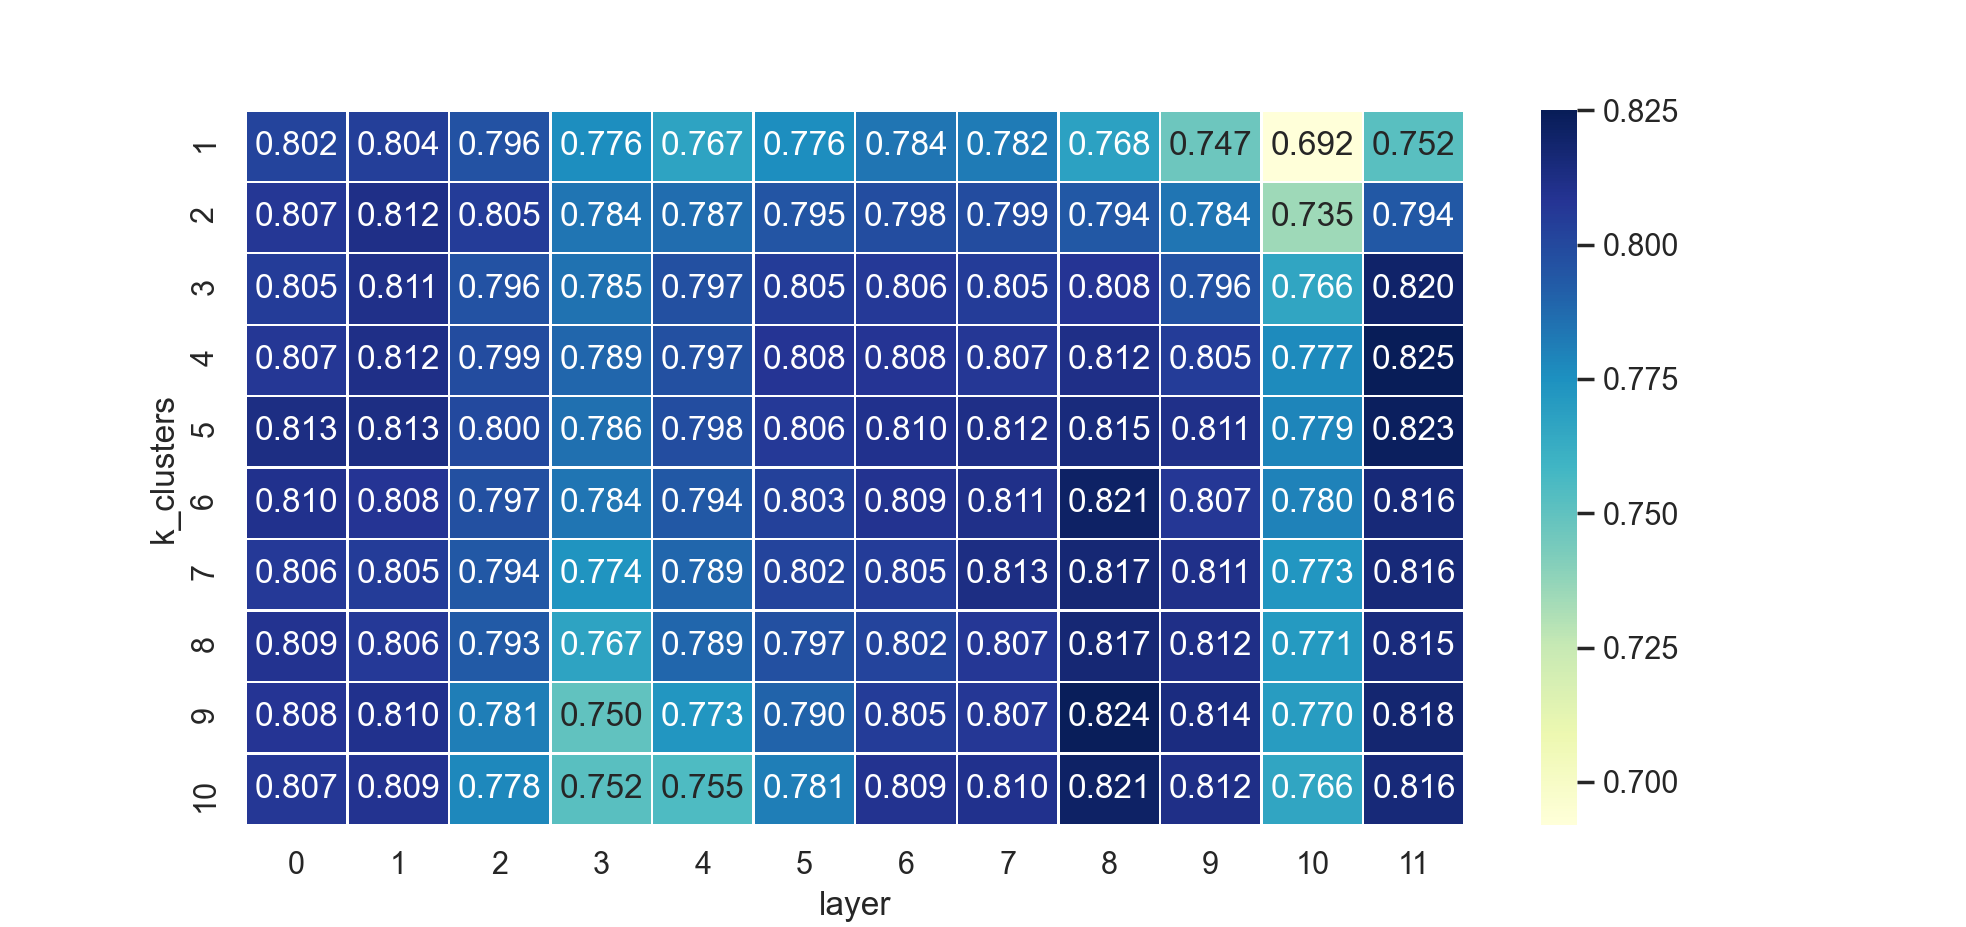

In [11]:
d = 'ws353_sim'
s = 'max_sim'
heatmap(d,s, 0)